# A simple map

Here we will showcase a few ways to make a simple map. We'll download some ice thickness data from BedMap2 for the Amery Ice Shelf. 

Import the modules

In [1]:
%%capture
%load_ext autoreload
%autoreload 2

from polartoolkit import fetch, maps, regions

Use the PolarToolkit `fetch` module to download the data and return the grid as an xarray.DataArrays

In [2]:
ice_thickness = fetch.bedmap2(
    layer="thickness",  # choose which layer to plot (e.g. 'surface', 'bed', 'icebase')
    region=regions.amery_ice_shelf,  # choose a pre-defined region, or set your own
    # fill_nans=True,  # fill no data values with 0
)

Create a simple map with default settings

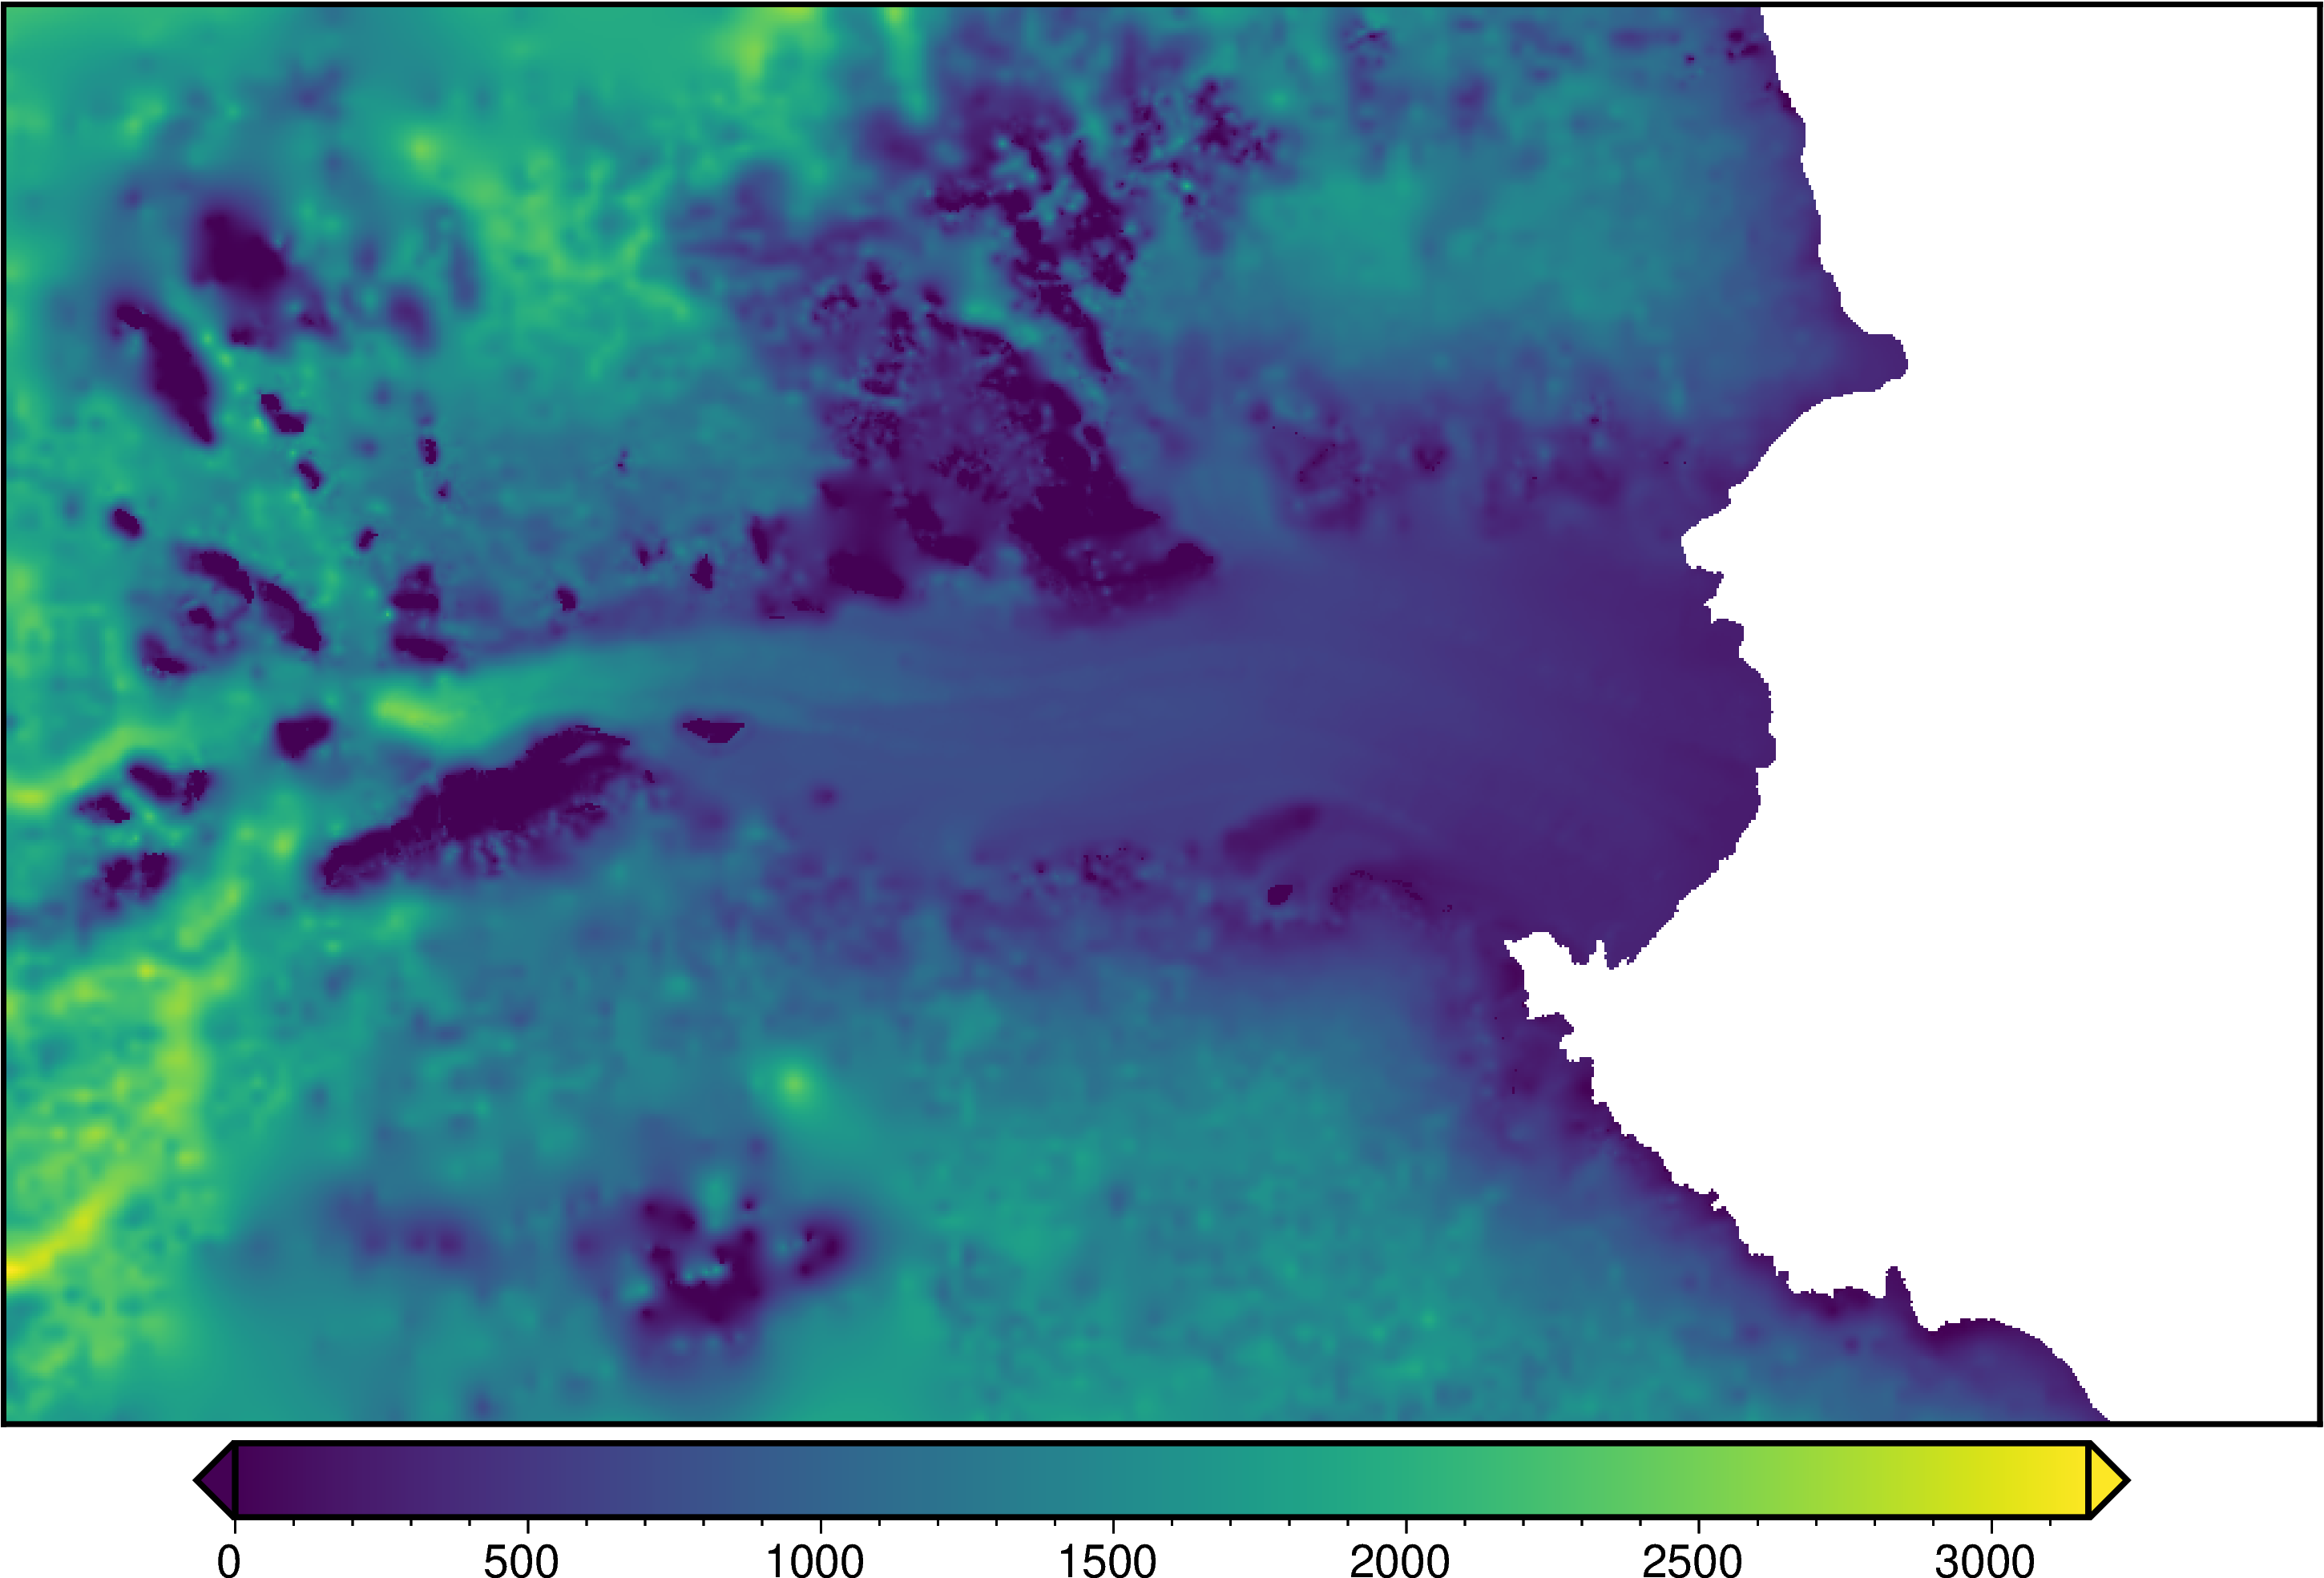

In [3]:
fig = maps.plot_grd(ice_thickness)

fig.show()

Change the colorscale (see available options at https://docs.generic-mapping-tools.org/6.2/cookbook/cpts.html) and add the coastline / groundingline

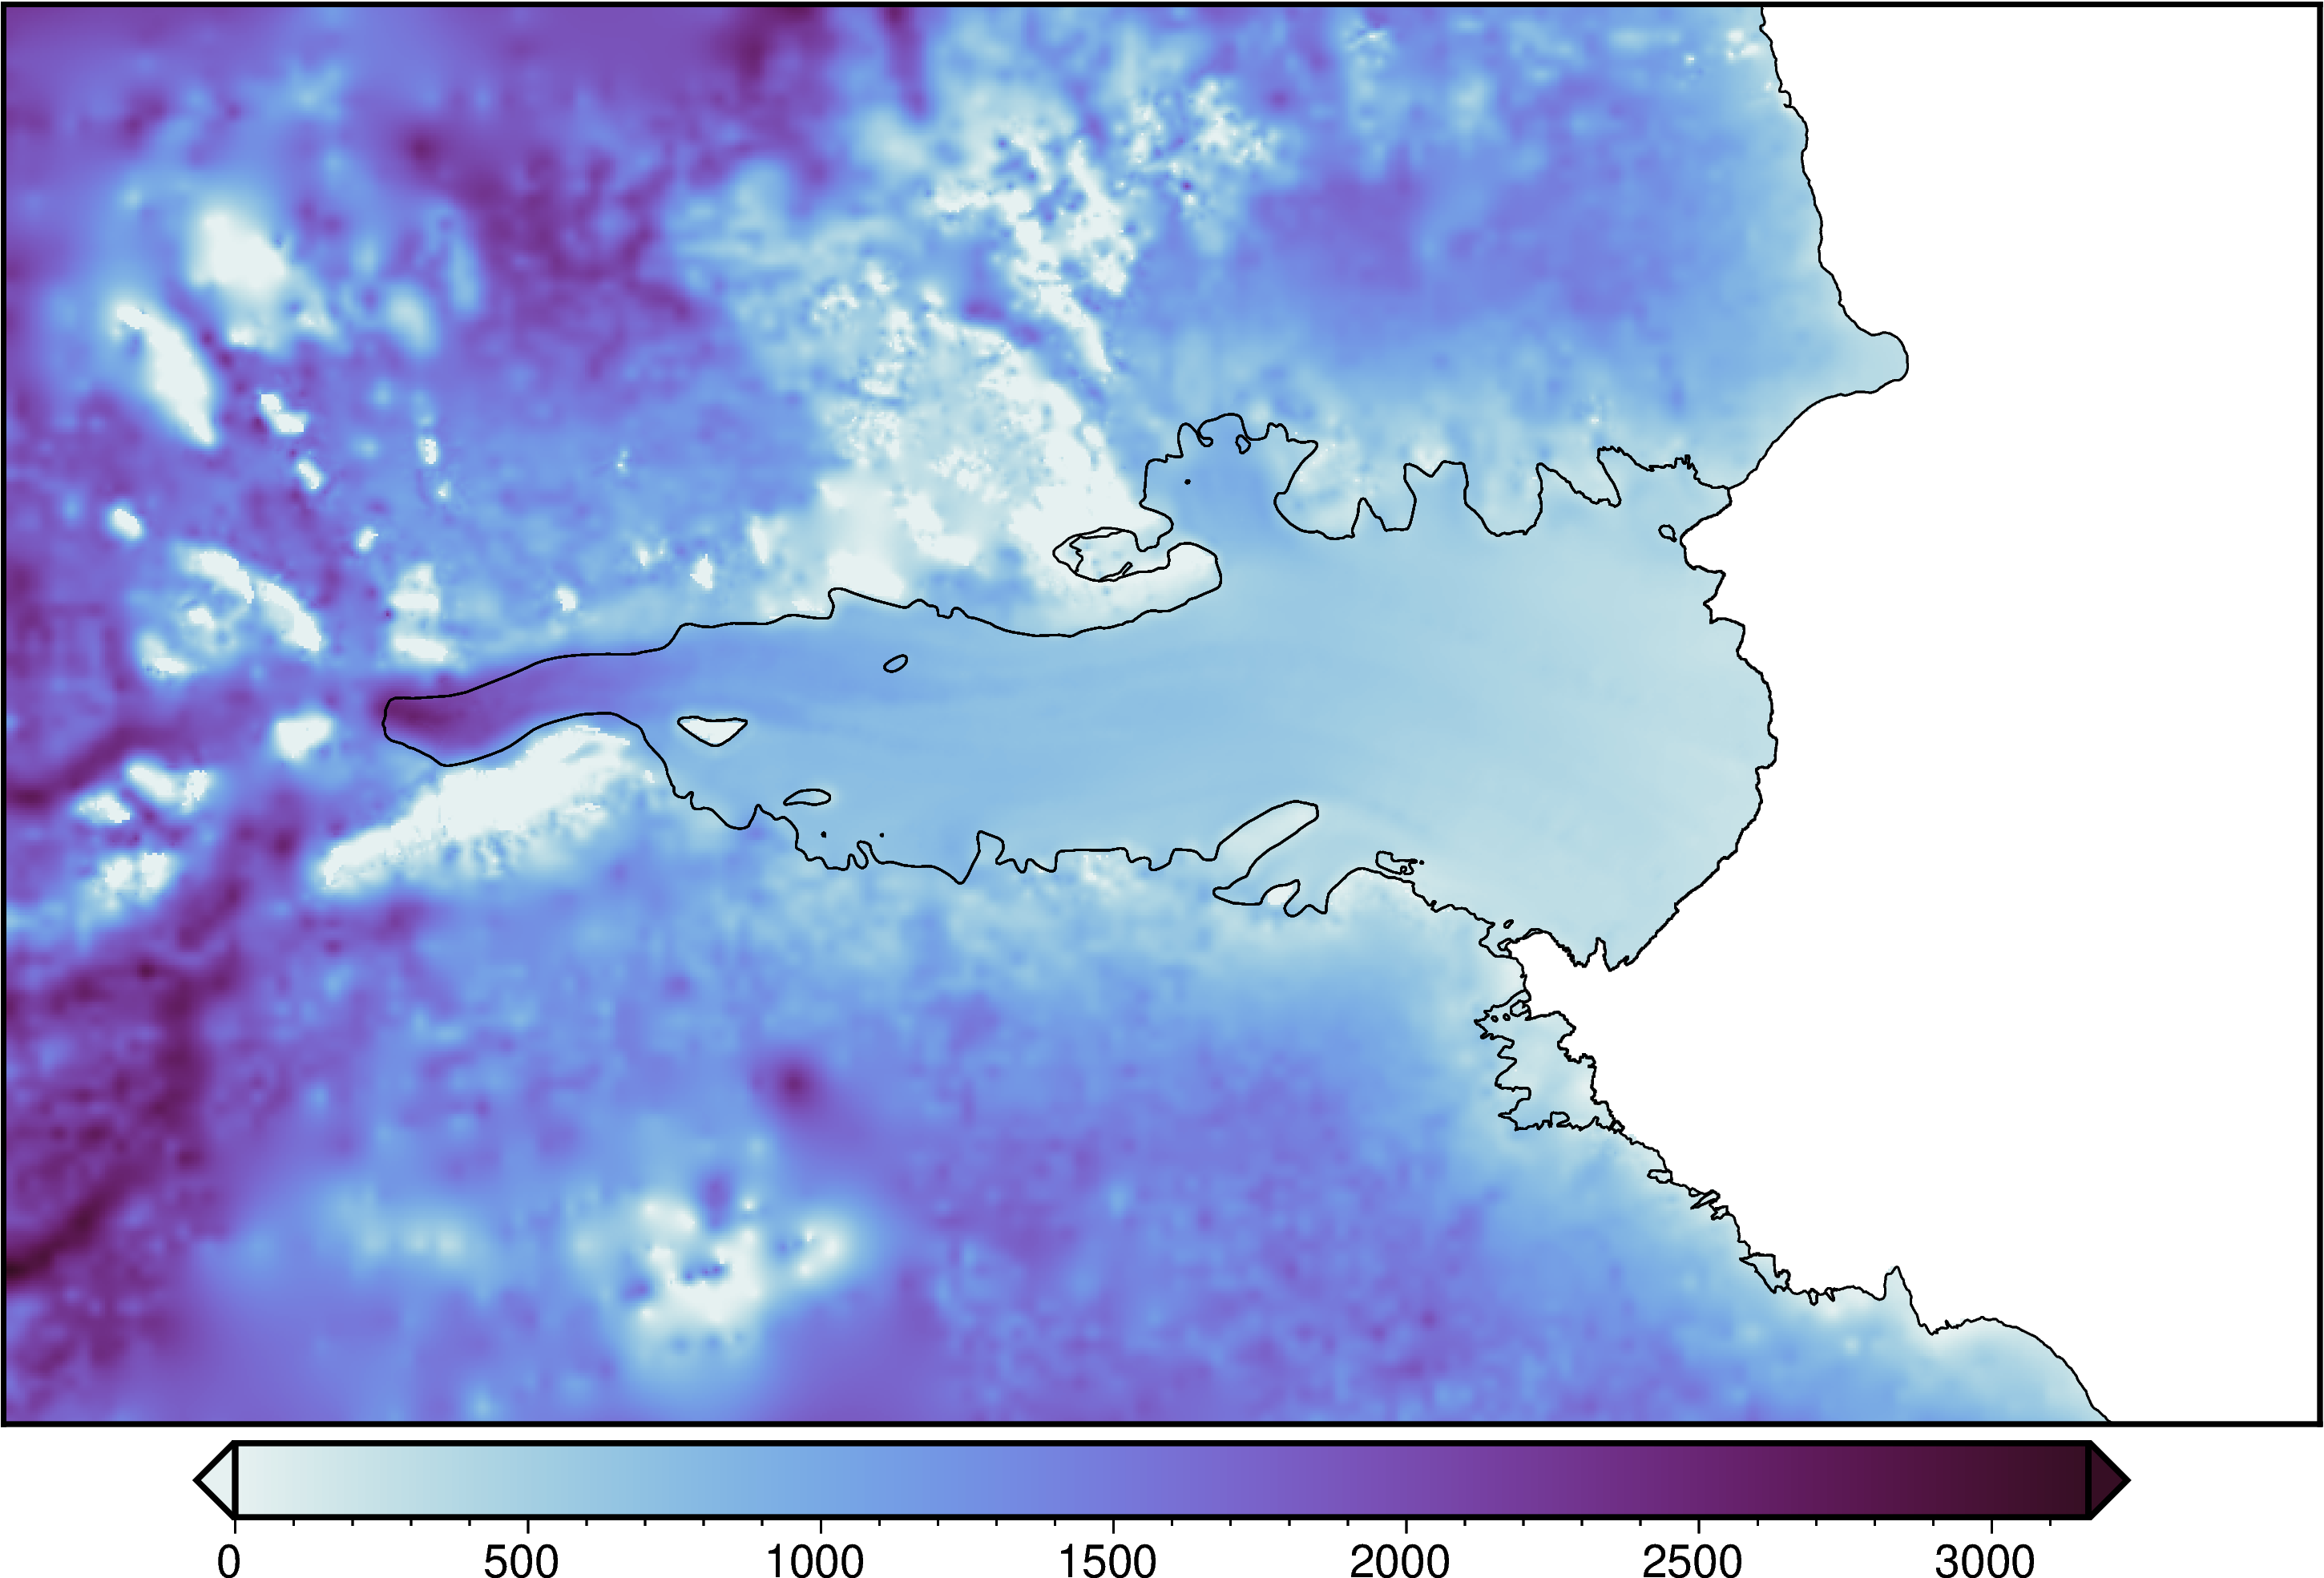

In [4]:
fig = maps.plot_grd(
    ice_thickness,
    cmap="dense",
)

# add the coastline and groundingline
maps.add_coast(fig)

fig.show()

Add additional features to the plot, all within the `plot_grd()` function

grd2cpt [ERROR]: Making a continuous cpt from a discrete cpt may give unexpected results!
gmtset [WARNING]: Representation of font type not recognized. Using default.


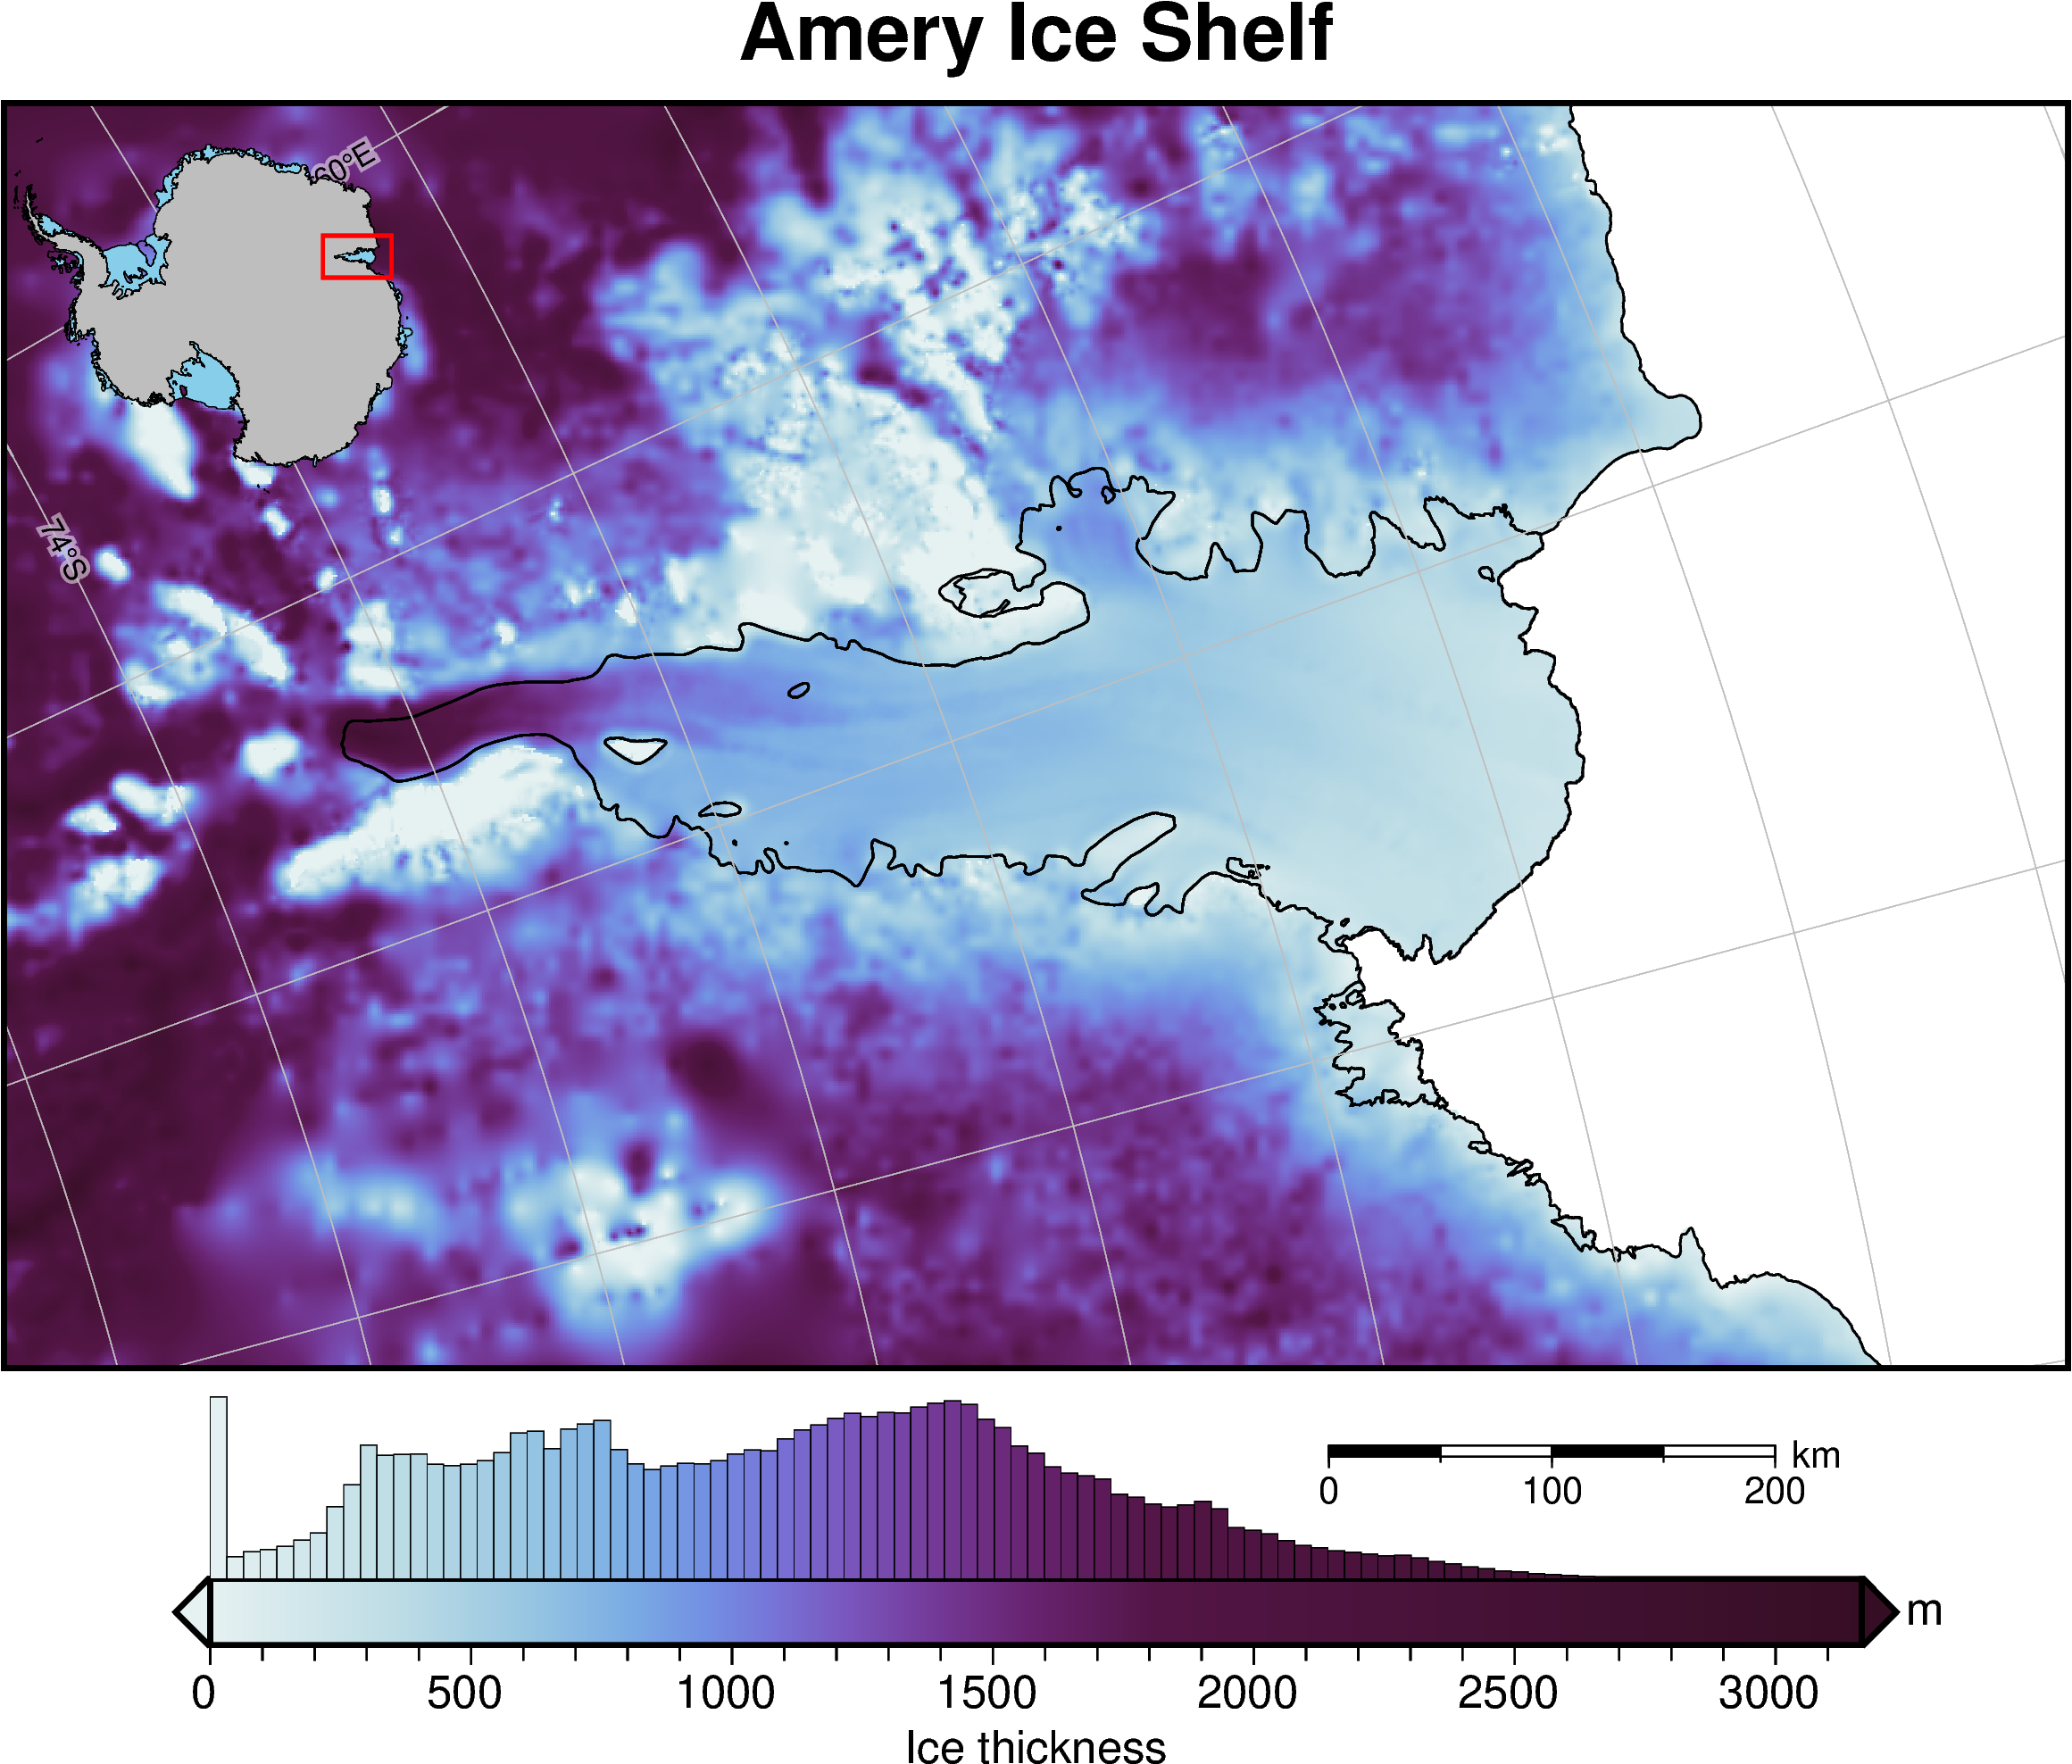

In [9]:
fig = maps.plot_grd(
    ice_thickness,
    fig_height=12,  # set figure height
    cmap="dense",  # set the colormap
    grd2cpt=True,  #
    coast=True,  # plot grounding and coastlines
    title="Amery Ice Shelf",
    cbar_label="Ice thickness",  # add label to colorbar
    cbar_unit="m",  # add units to y-axis of colorbar
    inset=True,  #  add inset map showing location
    inset_width=0.2,
    scalebar=True,  # add scalebar
    scale_position="n.75/-.07",
    gridlines=True,  # add lat/lon gridlines
    x_spacing=10,  # longitude interval (degrees)
    y_spacing=2,  # latitude interval (degrees)
    hist=True,  # add a histogram to the colorbar
    hist_bin_num=100,  # 100 bins
)

# display the figure
fig.show()